In [1]:
# WARNIMG : DO NOT CHANGE unless you need to add another function


def col1_to_col0(df): #remove col0 and make col1 as col0
    column_name = df.iloc[0]
    df = df.iloc[1:]
    df.columns = column_name
    return df

def tostring(string): #make sheet datas to str(object)
  if type(string) == int:
    return str(string)
  else:
    return string

def toint(string): #make sheet datas to floating number
  if type(string) == float:
    return int(string)
  else:
    return int(string)

def tofloat(string): #make sheet datas to floating number
  if type(string) == str:
    return float(string)
  else:
    return string

def yearchange(i): #change type of year to int
  i = int(i)
  i = str(i)
  if len(i) == 2 and i.find('1') == 0:
    return int('20' + i)
  elif len(i) == 2 and i.find('2') == 0:
    return int('20' + i)
  elif len(i) == 2 and i.find('1') != 0:
    return int('19' + i)
  elif len(i) == 2 and i.find('2') != 0:
    return int('19' + 1)
  elif len(i) == 1:
    return int('200' + i) 
  else:
    return int(i)

def sheettonum(string): #make sheet strings into floting number. unit: million 
  if type(string) == float:
    return string
  elif string.find('K') > -1:
    string = string.replace('K', '')
    string = int(string)
    return string/1000
  elif string.find('M') > 0:
    string = string.replace('M', '')
    return float(string)
  else:
    return float(string)


In [2]:
"""
the following functions will make your python coding easier than ever before.
please use these functions when you do coding in python3

::: DICTIONARY :::



"""

def sheettofloat(df, exception, exception2, exception3, exception4, exception5):
  for i in df:
    if i == exception :
      continue
    elif i == exception2:
      continue
    elif i == exception3:
      continue
    elif i == exception4:
      continue
    elif i == exception5:
      continue
    elif df[i].dtype == object:
      df[i] = df[i].apply(sheettonum)
    else:
      continue
  return df

def yearchangesheet(df):
  return df.apply(yearchange)

In [3]:
"""
tablecutting.py
"""

def col1_to_col0(df):
    column_name = df.iloc[0]
    df = df.iloc[1:]
    df.columns = column_name
    return df

def mymean(v):
  v = np.array(v)
  return sum(v)/len(v)

def myvar(v):
  return sum(((v - mymean(v))**2)/len(v))

def mystd(v):
  return (myvar(v)) ** 0.5


def cov(x, y, parentness): #calculate covariance 
  numerator = sum((np.array(x) - mymean(x)) * (np.array(y) - mymean(y)))
  N = len(x)
  if parentness == 'parent':
    return numerator / N
  elif parentness == 'child':
    return numerator / (N - 1)


def corr(x, y): #calculate correlationship
  numerator = sum((np.array(x) - mymean(x)) * (np.array(y) - mymean(y)))
  denominator = ((sum((np.array(x) - mymean(x))**2)) * (sum((np.array(y) - mymean(y))**2))) ** 0.5
  return numerator / denominator

def caltrend(eighty):
  action_eighty = np.sum(eighty[eighty['Genre'] == 'Action'])[2:]
  adv_eighty = np.sum(eighty[eighty['Genre'] == 'Adventure'])[2:]
  misc_eighty = np.sum(eighty[eighty['Genre'] == 'Misc'])[2:]
  plat_eighty = np.sum(eighty[eighty['Genre'] == 'Platform'])[2:]
  sport_eighty = np.sum(eighty[eighty['Genre'] == 'Sports'])[2:]
  sim_eighty = np.sum(eighty[eighty['Genre'] == 'Simulation'])[2:]
  racing_eighty = np.sum(eighty[eighty['Genre'] == 'Racing'])[2:]
  rp_eighty = np.sum(eighty[eighty['Genre'] == 'Role-Playing'])[2:]
  puzzle_eighty = np.sum(eighty[eighty['Genre'] == 'Puzzle'])[2:]
  rts_eighty = np.sum(eighty[eighty['Genre'] == 'Strategy'])[2:]
  fight_eighty = np.sum(eighty[eighty['Genre'] == 'Fighting'])[2:]
  shooter_eighty = np.sum(eighty[eighty['Genre'] == 'Shooter'])[2:]
  return pd.DataFrame([action_eighty, adv_eighty, misc_eighty, plat_eighty, sport_eighty, sim_eighty, racing_eighty, rp_eighty, puzzle_eighty, rts_eighty, fight_eighty, shooter_eighty], index=df_genre)


In [4]:
from scipy import stats
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv").dropna().drop(['Unnamed: 0'], axis=1)

In [6]:
df['Year'] = yearchangesheet(df['Year'])
df = sheettofloat(df, 'Name', 'Platform', 'Year', 'Genre', 'Publisher')
df_genre = df['Genre'].drop_duplicates(keep='first', inplace=False)

In [7]:
action = df['Genre'] == 'Action'
adventure = df['Genre'] == 'Adventure'
misc = df['Genre'] == 'Misc'
platform = df['Genre'] == 'Platform'
sport = df['Genre'] == 'Sports'
simulation = df['Genre'] == 'Simulation'
racing = df['Genre'] == 'Racing'
roleplaying = df['Genre'] == 'Role-Playing'
puzzle = df['Genre'] == 'Puzzle'
strategy = df['Genre'] == 'Strategy'
fighting = df['Genre'] == 'Fighting'
shooter = df['Genre'] == 'Shooter'

action = df[action].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
adventure = df[adventure].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
misc = df[misc].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
platform = df[platform].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
sport = df[sport].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
simulation = df[simulation].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
racing = df[racing].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
roleplaying = df[roleplaying].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
puzzle = df[puzzle].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
strategy = df[strategy].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
fighting = df[fighting].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)
shooter = df[shooter].drop(labels=['Name', 'Platform', 'Publisher'], axis=1)

action_ttm = action[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
adv_ttm = adventure[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
misc_ttm = misc[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
platf_ttm = platform[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
sport_ttm = sport[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
sim_ttm = simulation[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
racing_ttm = racing[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
rp_ttm = roleplaying[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
puzzle_ttm = puzzle[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
rts_ttm = strategy[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
fight_ttm = fighting[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
shooter_ttm = shooter[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

In [8]:
for i in action: #Calculate action game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator = round(df[i])
  numerator = np.sum(action[i])
  action_pf = numerator / denominator
  action_total = numerator / np.sum(df[i])
  action_means = (np.sum(action_total)) / 4 

for i in adventure: #Calculate adventure game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(adventure)[5:]), 2)
  numerator = np.sum(adventure[i])
  adventure_pf = numerator / denominator
  adventure_total = numerator / np.sum(df[i])
  adventure_means = (np.sum(adventure_total)) / 4 

for i in misc: #Calculate misc game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator = round(np.sum(np.sum(misc)[5:]), 2)
  numerator = np.sum(misc[i])
  misc_pf = numerator / denominator
  misc_means = round(np.mean(misc_pf), 2)
  misc_total = numerator / np.sum(df[i])
  misc_means = (np.sum(misc_total)) / 4 

for i in platform: #Calculate platform game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(platform)[5:]), 2)
  numerator = np.sum(platform[i])
  platform_pf = numerator / denominator
  platform_total = numerator / np.sum(df[i])
  platform_means = (np.sum(platform_total)) / 4

for i in sport: #Calculate sport game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator = round(np.sum(np.sum(sport)[5:]), 2)
  numerator = np.sum(sport[i])
  sport_pf = numerator / denominator
  sport_total = numerator / np.sum(df[i])
  sport_means = (np.sum(sport_total)) / 4
  
for i in simulation: #Calculate simulation game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(simulation)[5:]), 2)
  numerator = np.sum(simulation[i])
  simulation_pf = numerator / denominator
  simulation_total = numerator / np.sum(df[i])
  simulation_means = (np.sum(simulation_total)) / 4

for i in racing: #Calculate racing game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator = round(np.sum(np.sum(racing)[5:]), 2)
  numerator = np.sum(racing[i])
  racing_pf = numerator / denominator
  racing_total = numerator / np.sum(df[i])
  racing_means = (np.sum(racing_total)) / 4

  
for i in roleplaying: #Calculate rp game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(roleplaying)[5:]), 2)
  numerator = np.sum(roleplaying[i])
  roleplaying_pf = numerator / denominator
  roleplaying_total = numerator / np.sum(df[i])
  roleplaying_means = (np.sum(roleplaying_total)) / 4

for i in puzzle: #Calculate puzzle game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator = round(np.sum(np.sum(puzzle)[5:]), 2)
  numerator = np.sum(puzzle[i])
  puzzle_pf = numerator / denominator
  puzzle_total = numerator / np.sum(df[i])
  puzzle_means = (np.sum(puzzle_total)) / 4
  
for i in strategy: #Calculate strategy game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(strategy)[5:]), 2)
  numerator = np.sum(strategy[i])
  strategy_pf = numerator / denominator
  strategy_total = numerator / np.sum(df[i])
  strategy_means = (np.sum(strategy_total)) / 4

for i in fighting: #Calculate fighting game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(fighting)[5:]), 2)
  numerator = np.sum(fighting[i])
  fighting_pf = numerator / denominator
  fighting_total = numerator / np.sum(df[i])
  fighting_means = (np.sum(fighting_total)) / 4

for i in shooter: #Calculate shooter game preferences
  i = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  denominator =round(np.sum(np.sum(shooter)[5:]), 2)
  numerator = np.sum(shooter[i])
  shooter_pf = numerator / denominator
  shooter_total = numerator / np.sum(df[i])
  shooter_means = (np.sum(shooter_total)) / 4


In [9]:
meanplot = pd.DataFrame([action_means, adventure_means, misc_means, platform_means, sport_means, simulation_means, racing_means, roleplaying_means, puzzle_means, strategy_means, fighting_means, shooter_means], index=df_genre, columns=['Mean'])

In [10]:
"""
이 부분은 수동으로 DataFrame을 수정하기 위한 란입니다. 무시해도 좋습니다.
"""

prefdt = pd.DataFrame([action_total, adventure_total, misc_total, platform_total, sport_total, simulation_total, racing_total, roleplaying_total, puzzle_total, strategy_total, fighting_total, shooter_total], index=df_genre)
prefdt.to_csv('Users\\shinjeongtae\\Downloads\\prefdt.csv', sep=',')
prefdt = pd.read_csv('/content/dataframe.csv')

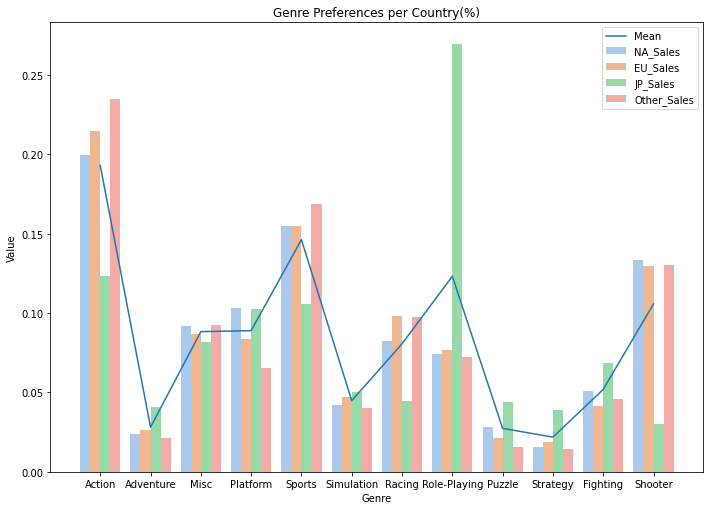

In [11]:
import seaborn as sns
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims) #Size
pyplot.title('Genre Preferences per Country(%)')
sns.barplot(x='Genre', y='Value', hue='Sales', palette="pastel", data=prefdt); #Genre Preferences per Country - percent
sns.lineplot(data=meanplot);

In [12]:
act = df[df['Genre']=='Action'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
adv = df[df['Genre']=='Adventure'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
mis = df[df['Genre']=='Misc'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
plf = df[df['Genre']=='Platform'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
spt = df[df['Genre']=='Sports'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
sim = df[df['Genre']=='Simulation'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
rce = df[df['Genre']=='Racing'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
rpg = df[df['Genre']=='Role-Playing'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
puz = df[df['Genre']=='Puzzle'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
rts = df[df['Genre']=='Strategy'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
fgt = df[df['Genre']=='Fighting'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)
fps = df[df['Genre']=='Shooter'].drop(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], axis=1)

In [13]:
from scipy.stats import f_oneway
actpval = f_oneway(act['EU_Sales'], act['JP_Sales'], act['NA_Sales'], act['Other_Sales']).pvalue
advpval = f_oneway(adv['EU_Sales'], adv['JP_Sales'], adv['NA_Sales'], adv['Other_Sales']).pvalue
mispval = f_oneway(mis['EU_Sales'], mis['JP_Sales'], mis['NA_Sales'], mis['Other_Sales']).pvalue
plfpval = f_oneway(plf['EU_Sales'], plf['JP_Sales'], plf['NA_Sales'], plf['Other_Sales']).pvalue
sptpval = f_oneway(spt['EU_Sales'], spt['JP_Sales'], spt['NA_Sales'], spt['Other_Sales']).pvalue
simpval = f_oneway(sim['EU_Sales'], sim['JP_Sales'], sim['NA_Sales'], sim['Other_Sales']).pvalue
rcepval = f_oneway(rce['EU_Sales'], rce['JP_Sales'], rce['NA_Sales'], rce['Other_Sales']).pvalue
rpgpval = f_oneway(rpg['EU_Sales'], rpg['JP_Sales'], rpg['NA_Sales'], rpg['Other_Sales']).pvalue
puzpval = f_oneway(puz['EU_Sales'], puz['JP_Sales'], puz['NA_Sales'], puz['Other_Sales']).pvalue
rtspval = f_oneway(rts['EU_Sales'], rts['JP_Sales'], rts['NA_Sales'], rts['Other_Sales']).pvalue
fgtpval = f_oneway(fgt['EU_Sales'], fgt['JP_Sales'], fgt['NA_Sales'], fgt['Other_Sales']).pvalue
fptpval = f_oneway(fps['EU_Sales'], fps['JP_Sales'], fps['NA_Sales'], fps['Other_Sales']).pvalue

In [93]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [94]:

v = np.concatenate([act['NA_Sales'], act['EU_Sales'], act['JP_Sales'], act['Other_Sales']])
labels = ['NA_Sales']*len(act['NA_Sales']) + ['EU_Sales']*len(act['EU_Sales']) + ['JP_Sales']*len(act['JP_Sales']) + ['Other_Sales']*len(act['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([adv['NA_Sales'], adv['EU_Sales'], adv['JP_Sales'], adv['Other_Sales']])
labels = ['NA_Sales']*len(adv['NA_Sales']) + ['EU_Sales']*len(adv['EU_Sales']) + ['JP_Sales']*len(adv['JP_Sales']) + ['Other_Sales']*len(adv['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([mis['NA_Sales'], mis['EU_Sales'], mis['JP_Sales'], mis['Other_Sales']])
labels = ['NA_Sales']*len(mis['NA_Sales']) + ['EU_Sales']*len(mis['EU_Sales']) + ['JP_Sales']*len(mis['JP_Sales']) + ['Other_Sales']*len(mis['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([plf['NA_Sales'], plf['EU_Sales'], plf['JP_Sales'], plf['Other_Sales']])
labels = ['NA_Sales']*len(plf['NA_Sales']) + ['EU_Sales']*len(plf['EU_Sales']) + ['JP_Sales']*len(plf['JP_Sales']) + ['Other_Sales']*len(plf['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)


v = np.concatenate([spt['NA_Sales'], spt['EU_Sales'], spt['JP_Sales'], spt['Other_Sales']])
labels = ['NA_Sales']*len(spt['NA_Sales']) + ['EU_Sales']*len(spt['EU_Sales']) + ['JP_Sales']*len(spt['JP_Sales']) + ['Other_Sales']*len(spt['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([sim['EU_Sales'], sim['JP_Sales'], sim['NA_Sales'], sim['Other_Sales']])
labels = ['EU_Sales']*len(sim['EU_Sales']) + ['JP_Sales']*len(sim['JP_Sales']) + ['NA_Sales']*len(sim['JP_Sales']) + ['Other_Sales']*len(sim['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([rce['EU_Sales'], rce['JP_Sales'], rce['NA_Sales'], rce['Other_Sales']])
labels = ['EU_Sales']*len(rce['EU_Sales']) + ['JP_Sales']*len(rce['JP_Sales']) + ['NA_Sales']*len(rce['JP_Sales']) + ['Other_Sales']*len(rce['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([rpg['EU_Sales'], rpg['JP_Sales'], rpg['NA_Sales'], rpg['Other_Sales']])
labels = ['EU_Sales']*len(rpg['EU_Sales']) + ['JP_Sales']*len(rpg['JP_Sales']) + ['NA_Sales']*len(rpg['JP_Sales']) + ['Other_Sales']*len(rpg['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([puz['EU_Sales'], puz['JP_Sales'], puz['NA_Sales'], puz['Other_Sales']])
labels = ['EU_Sales']*len(puz['EU_Sales']) + ['JP_Sales']*len(puz['JP_Sales']) + ['NA_Sales']*len(puz['JP_Sales']) + ['Other_Sales']*len(puz['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([rts['EU_Sales'], rts['JP_Sales'], rts['NA_Sales'], rts['Other_Sales']])
labels = ['EU_Sales']*len(rts['EU_Sales']) + ['JP_Sales']*len(rts['JP_Sales']) + ['NA_Sales']*len(rts['JP_Sales']) + ['Other_Sales']*len(rts['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([fgt['EU_Sales'], fgt['JP_Sales'], fgt['NA_Sales'], fgt['Other_Sales']])
labels = ['EU_Sales']*len(fgt['EU_Sales']) + ['JP_Sales']*len(fgt['JP_Sales']) + ['NA_Sales']*len(fgt['JP_Sales']) + ['Other_Sales']*len(fgt['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

v = np.concatenate([fps['EU_Sales'], fps['JP_Sales'], fps['NA_Sales'], fps['Other_Sales']])
labels = ['EU_Sales']*len(fps['EU_Sales']) + ['JP_Sales']*len(fps['JP_Sales']) + ['NA_Sales']*len(fps['JP_Sales']) + ['Other_Sales']*len(fps['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2   meandiff p-adj  lower   upper  reject
----------------------------------------------------------
EU_Sales    JP_Sales  -0.1102 0.001 -0.1345 -0.0859   True
EU_Sales    NA_Sales   0.1065 0.001  0.0822  0.1308   True
EU_Sales Other_Sales  -0.1017 0.001 -0.1261 -0.0774   True
JP_Sales    NA_Sales   0.2167 0.001  0.1924   0.241   True
JP_Sales Other_Sales   0.0085 0.784 -0.0159  0.0328  False
NA_Sales Other_Sales  -0.2083 0.001 -0.2326 -0.1839   True
----------------------------------------------------------
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2   meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
EU_Sales    JP_Sales  -0.0093 0.5272  -0.027  0.0084  False
EU_Sales    NA_Sales   0.0301  0.001  0.0124  0.0478   True
EU_Sales Other_Sales   -0.037  0.001 -0.0547 -0.0193   True
JP_Sales    NA_Sales   0.0394  0.001  0.0217  0.05

In [15]:
def pvaltest(floating):
  if floating > 0.05 and floating < 0.1:
    print("do the test again.")
  elif floating > 0.1:
    print("accept null hypothesis")
  else:
    print("reject null hypothesis")

In [16]:
pvaltest(actpval)
pvaltest(advpval)
pvaltest(mispval)
pvaltest(plfpval)
pvaltest(sptpval)
pvaltest(simpval)
pvaltest(rcepval)
pvaltest(rpgpval)
pvaltest(puzpval)
pvaltest(rtspval)
pvaltest(fgtpval)
pvaltest(fptpval)

reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis
reject null hypothesis


In [17]:
eighty = df['Year'] < 1990
niney = np.logical_and(1990 <= df['Year'], df['Year'] < 2000)
twnetyy = np.logical_and(2000 <= df['Year'], df['Year'] < 2010)
twentyny = np.logical_and(2010 <= df['Year'], df['Year'] < 2020)

eighty = df[eighty].drop(['Name', 'Platform', 'Publisher'], axis=1)
niney = df[niney].drop(['Name', 'Platform', 'Publisher'], axis=1)
twnetyy = df[twnetyy].drop(['Name', 'Platform', 'Publisher'], axis=1)
twentyny = df[twentyny].drop(['Name', 'Platform', 'Publisher'], axis=1)

In [18]:
eighty = caltrend(eighty)
niney = caltrend(niney)
twnetyy = caltrend(twnetyy)
twentyny = caltrend(twentyny)

In [19]:
natrend = pd.DataFrame([eighty['NA_Sales'], niney['NA_Sales'], twnetyy['NA_Sales'], twentyny['NA_Sales']], index=['1980s', '1990s', '2000s', '2010s'], columns = df_genre)
eutrend = pd.DataFrame([eighty['EU_Sales'], niney['EU_Sales'], twnetyy['EU_Sales'], twentyny['EU_Sales']], index=['1980s', '1990s', '2000s', '2010s'], columns = df_genre)
jptrend = pd.DataFrame([eighty['JP_Sales'], niney['JP_Sales'], twnetyy['JP_Sales'], twentyny['JP_Sales']], index=['1980s', '1990s', '2000s', '2010s'], columns = df_genre)
othertrend = pd.DataFrame([eighty['Other_Sales'], niney['Other_Sales'], twnetyy['Other_Sales'], twentyny['Other_Sales']], index=['1980s', '1990s', '2000s', '2010s'], columns = df_genre)

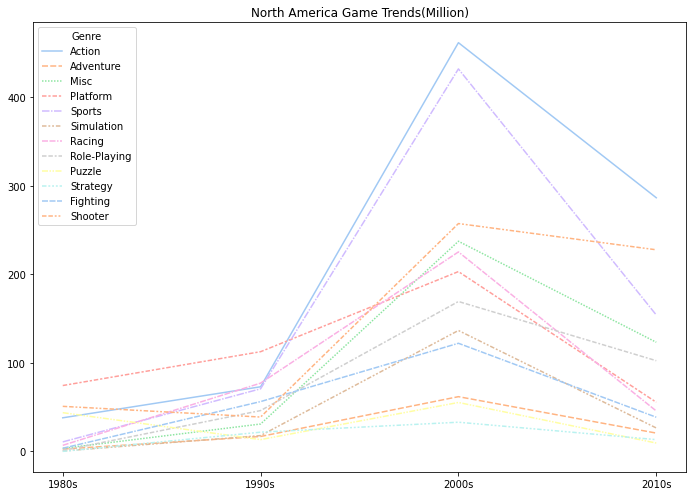

In [20]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims) #Size
pyplot.title('North America Game Trends(Million)');
sns.lineplot(data=natrend, palette='pastel');

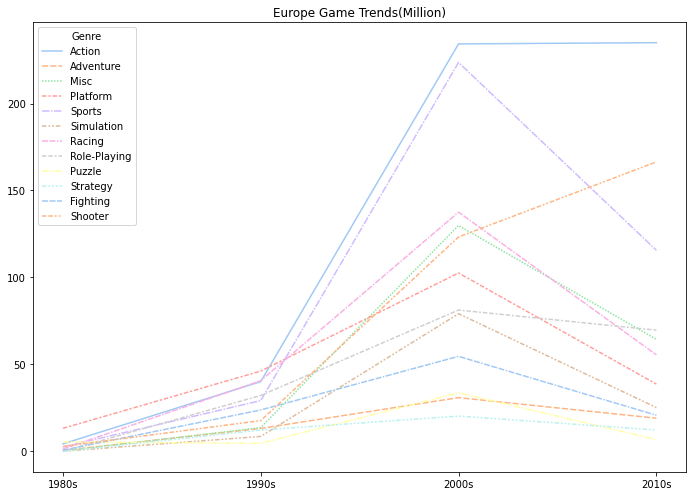

In [21]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims) #Size
pyplot.title('Europe Game Trends(Million)')
sns.lineplot(data=eutrend, palette='pastel');

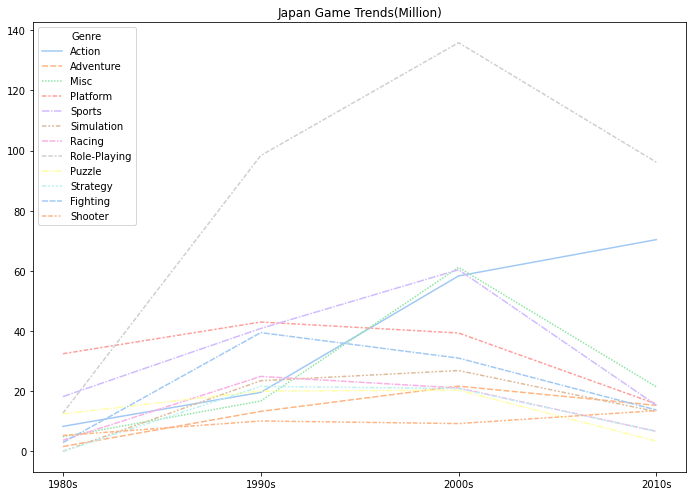

In [22]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims) #Size
pyplot.title('Japan Game Trends(Million)')
sns.lineplot(data=jptrend, palette='pastel');

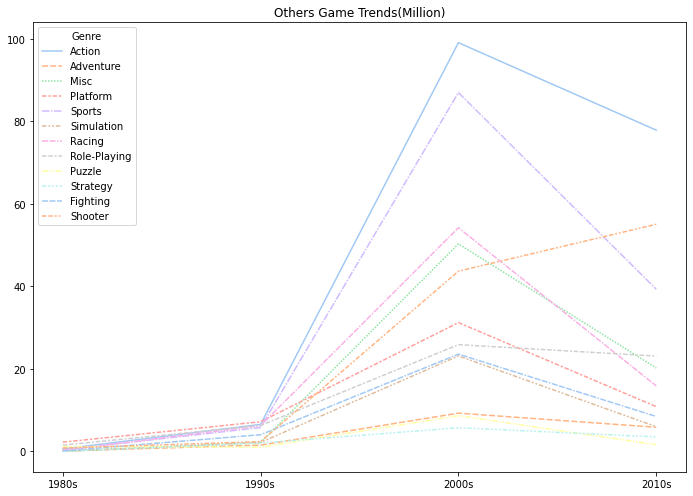

In [23]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims) #Size
pyplot.title('Others Game Trends(Million)')
sns.lineplot(data=othertrend, palette='pastel');

In [24]:
action_XXII = action['Year'] > 2009
action_XXII = action[action_XXII].groupby(['Year'], as_index=False).sum()

adventure_XXII = adventure['Year'] > 2009
adventure_XXII = adventure[adventure_XXII].groupby(['Year'], as_index=False).sum()

misc_XXII = misc['Year'] > 2009
misc_XXII = misc[misc_XXII].groupby(['Year'], as_index=False).sum()

platform_XXII = platform['Year'] > 2009
platform_XXII = platform[platform_XXII].groupby(['Year'], as_index=False).sum()

sport_XXII = sport['Year'] > 2009
sport_XXII = sport[sport_XXII].groupby(['Year'], as_index=False).sum()

simulation_XXII = simulation['Year'] > 2009
simulation_XXII = simulation[simulation_XXII].groupby(['Year'], as_index=False).sum()

racing_XXII = racing['Year'] > 2009
racing_XXII = racing[racing_XXII].groupby(['Year'], as_index=False).sum()

roleplaying_XXII = roleplaying['Year'] > 2009
roleplaying_XXII = roleplaying[roleplaying_XXII].groupby(['Year'], as_index=False).sum()

puzzle_XXII = puzzle['Year'] > 2009
puzzle_XXII = puzzle[puzzle_XXII].groupby(['Year'], as_index=False).sum()

strategy_XXII = strategy['Year'] > 2009
strategy_XXII = strategy[strategy_XXII].groupby(['Year'], as_index=False).sum()

fighting_XXII = fighting['Year'] > 2009
fighting_XXII = fighting[fighting_XXII].groupby(['Year'], as_index=False).sum()

shooter_XXII = shooter['Year'] > 2009
shooter_XXII = shooter[shooter_XXII].groupby(['Year'], as_index=False).sum()

In [25]:
trendall = pd.DataFrame(data=[action_XXII['NA_Sales'], adventure_XXII['NA_Sales'], misc_XXII['NA_Sales'], platform_XXII['NA_Sales'], sport_XXII['NA_Sales'], simulation_XXII['NA_Sales'], racing_XXII['NA_Sales'], roleplaying_XXII['NA_Sales'], puzzle_XXII['NA_Sales'], strategy_XXII['NA_Sales'], fighting_XXII['NA_Sales'], shooter_XXII['NA_Sales']]).set_index(df_genre).fillna(0).transpose()
xxiiyears = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
trendall.index=xxiiyears
trendall = trendall.drop('2017')

trendeu = pd.DataFrame(data=[action_XXII['EU_Sales'], adventure_XXII['EU_Sales'], misc_XXII['EU_Sales'], platform_XXII['EU_Sales'], sport_XXII['EU_Sales'], simulation_XXII['EU_Sales'], racing_XXII['EU_Sales'], roleplaying_XXII['EU_Sales'], puzzle_XXII['EU_Sales'], strategy_XXII['EU_Sales'], fighting_XXII['EU_Sales'], shooter_XXII['EU_Sales']]).set_index(df_genre).fillna(0).transpose()
xxiiyears = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
trendeu.index=xxiiyears
trendeu = trendeu.drop('2017')

trendjp = pd.DataFrame(data=[action_XXII['JP_Sales'], adventure_XXII['JP_Sales'], misc_XXII['JP_Sales'], platform_XXII['JP_Sales'], sport_XXII['JP_Sales'], simulation_XXII['JP_Sales'], racing_XXII['JP_Sales'], roleplaying_XXII['JP_Sales'], puzzle_XXII['JP_Sales'], strategy_XXII['JP_Sales'], fighting_XXII['JP_Sales'], shooter_XXII['JP_Sales']]).set_index(df_genre).fillna(0).transpose()
xxiiyears = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
trendjp.index=xxiiyears
trendjp = trendjp.drop('2017')

trendot = pd.DataFrame(data=[action_XXII['Other_Sales'], adventure_XXII['Other_Sales'], misc_XXII['Other_Sales'], platform_XXII['Other_Sales'], sport_XXII['Other_Sales'], simulation_XXII['Other_Sales'], racing_XXII['Other_Sales'], roleplaying_XXII['Other_Sales'], puzzle_XXII['Other_Sales'], strategy_XXII['Other_Sales'], fighting_XXII['Other_Sales'], shooter_XXII['Other_Sales']]).set_index(df_genre).fillna(0).transpose()
xxiiyears = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
trendot.index=xxiiyears
trendot = trendot.drop('2017')

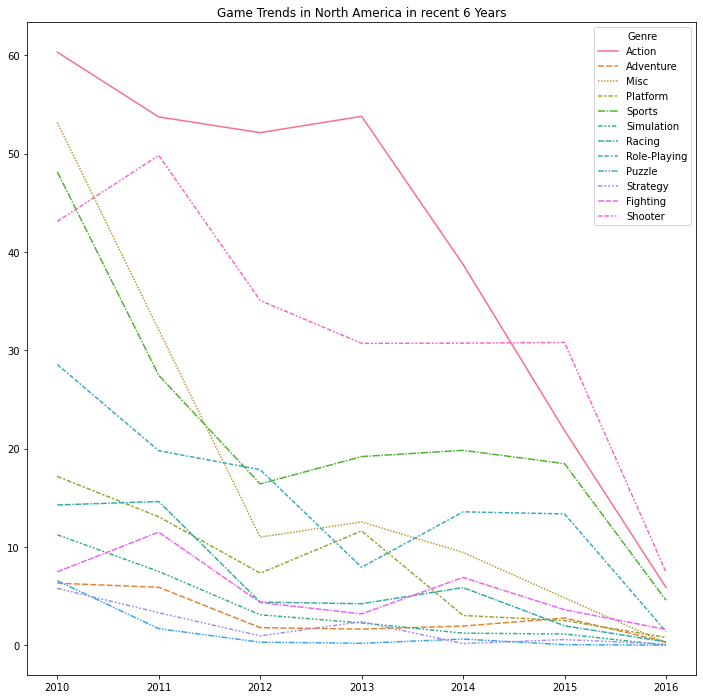

In [26]:
fig = plt.figure(figsize = (12, 12))
plt.title('Game Trends in North America in recent 6 Years')
sns.lineplot(data=trendall);

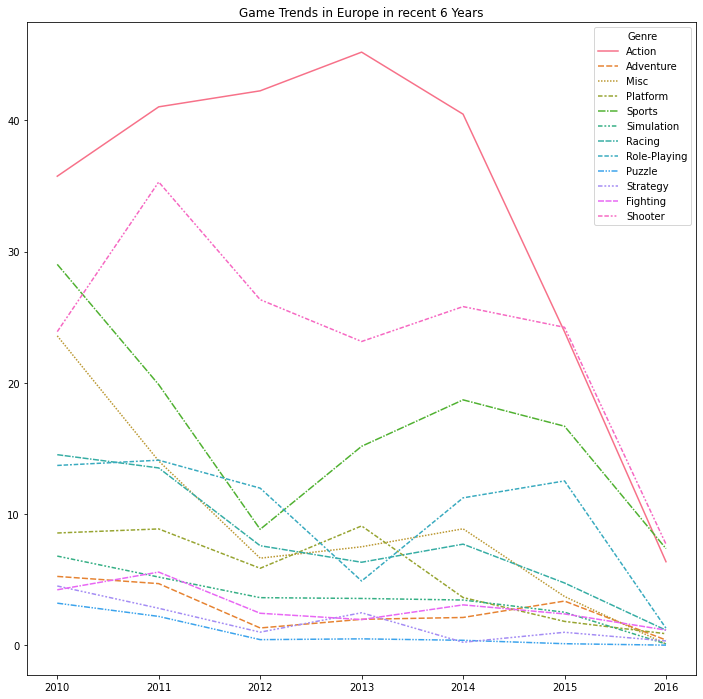

In [27]:
fig = plt.figure(figsize = (12, 12))
plt.title('Game Trends in Europe in recent 6 Years')
sns.lineplot(data=trendeu);

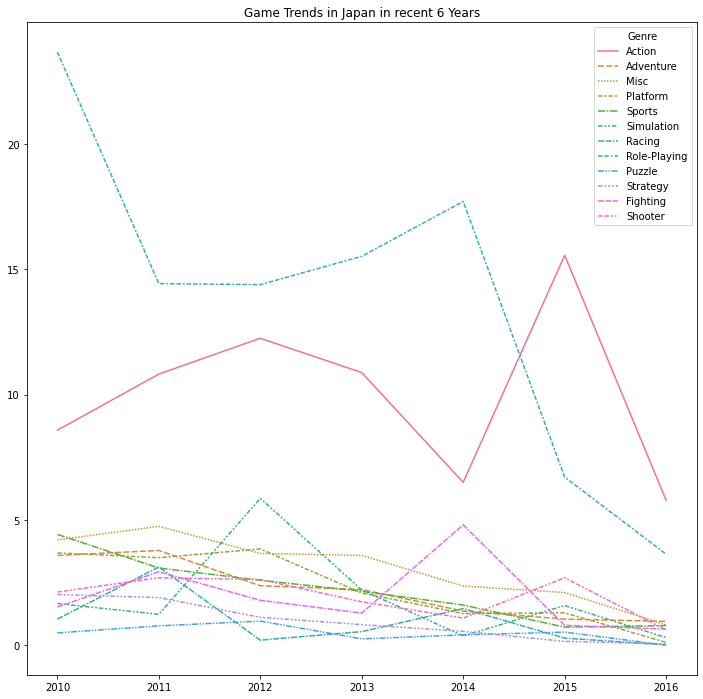

In [28]:
fig = plt.figure(figsize = (12, 12))
plt.title('Game Trends in Japan in recent 6 Years')
sns.lineplot(data=trendjp);

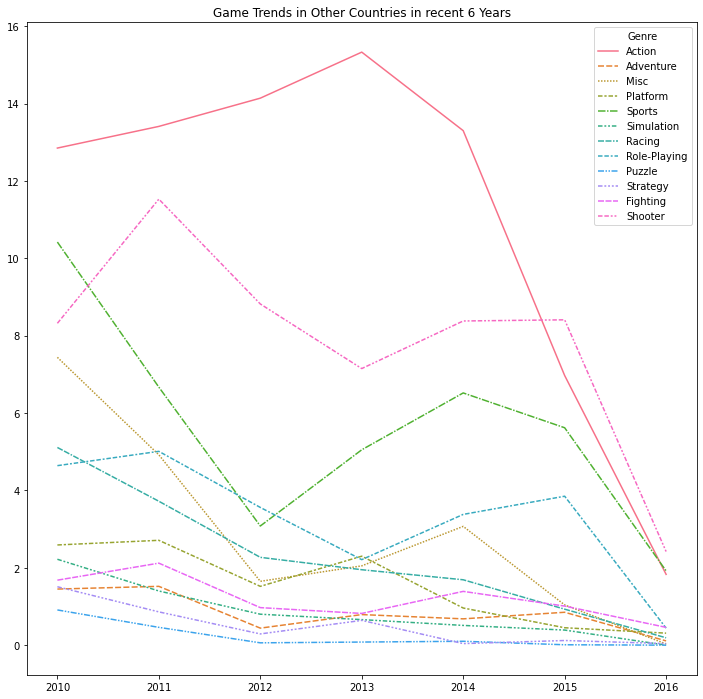

In [29]:
fig = plt.figure(figsize = (12, 12))
plt.title('Game Trends in Other Countries in recent 6 Years')
sns.lineplot(data=trendot);

In [30]:
trend_action = action.groupby(['Year'], as_index=False).sum()
trend_adventure = adventure.groupby(['Year'], as_index=False).sum()
trend_misc = misc.groupby(['Year'], as_index=False).sum()
trend_platform = platform.groupby(['Year'], as_index=False).sum()
trend_simulation = simulation.groupby(['Year'], as_index=False).sum()
trend_sport = sport.groupby(['Year'], as_index=False).sum()
trend_racing = racing.groupby(['Year'], as_index=False).sum()
trend_roleplaying = roleplaying.groupby(['Year'], as_index=False).sum()
trend_puzzle = puzzle.groupby(['Year'], as_index=False).sum()
trend_strategy = strategy.groupby(['Year'], as_index=False).sum()
trend_fighting = fighting.groupby(['Year'], as_index=False).sum()
trend_shooter = shooter.groupby(['Year'], as_index=False).sum()

In [31]:
import matplotlib.pyplot as plt

df = df[df['Year'] > 1999]

best_publishers = df.tail(10).reset_index()['Publisher'].to_list()

In [33]:
for i in df:
  df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

games_publishers = df.groupby('Publisher').agg({'Global_Sales': 'sum'}).sort_values('Global_Sales')

best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()

In [34]:
best_publishers

['Sega',
 'Konami Digital Entertainment',
 'Microsoft Game Studios',
 'THQ',
 'Take-Two Interactive',
 'Sony Computer Entertainment',
 'Ubisoft',
 'Activision',
 'Electronic Arts',
 'Nintendo']

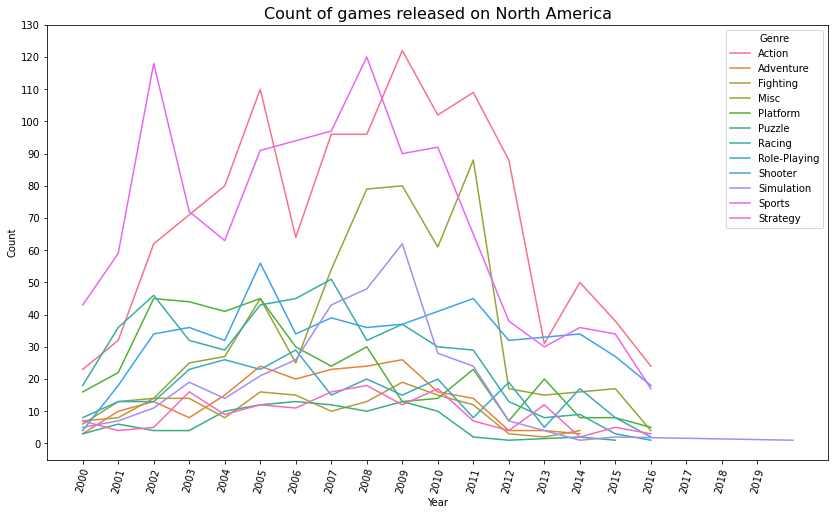

In [35]:
for i in df:
  df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

g_publisher_d = df[df['NA_Sales']>0.001].query('Publisher == @best_publishers').groupby(['Year', 'Genre']).agg({'Genre': 'count'}).rename(columns = {'Genre': 'Count'})
g_publisher_d

plt.figure(figsize = (14,8))
plt.title('Count of games released on North America', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Genre', data = g_publisher_d)
plt.xticks(range(2000, 2020, 1), rotation = 75)
plt.yticks(range(0, 131, 10))
plt.show()

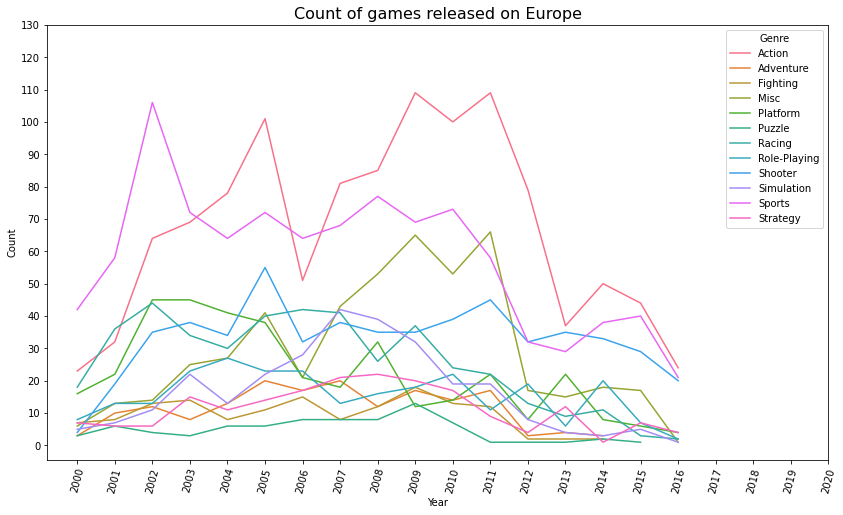

In [36]:
g_publisher_d = df[df['EU_Sales']>0.001].query('Publisher == @best_publishers').groupby(['Year', 'Genre']).agg({'Genre': 'count'}).rename(columns = {'Genre': 'Count'})
g_publisher_d

plt.figure(figsize = (14,8))
plt.title('Count of games released on Europe', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Genre', data = g_publisher_d)
plt.xticks(range(2000, 2021, 1), rotation = 75)
plt.yticks(range(0, 131, 10))
plt.show()

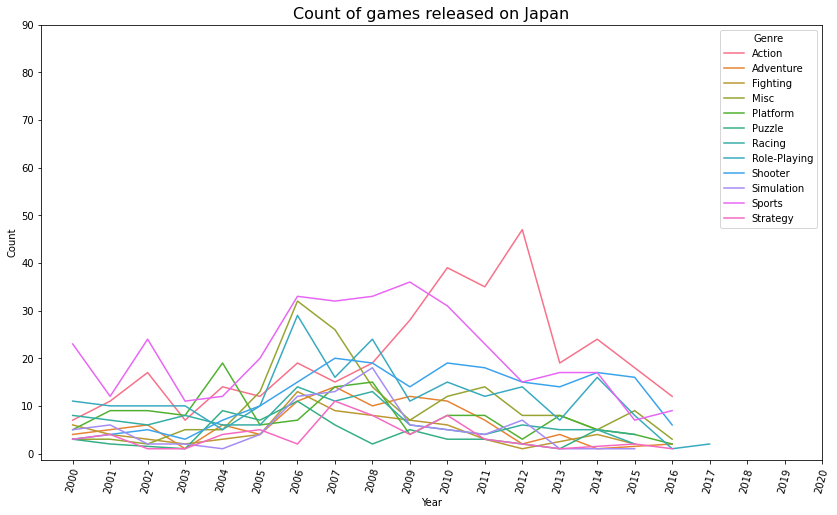

In [37]:
g_publisher_d = df[df['JP_Sales']>0.001].query('Publisher == @best_publishers').groupby(['Year', 'Genre']).agg({'Genre': 'count'}).rename(columns = {'Genre': 'Count'})
g_publisher_d

plt.figure(figsize = (14,8))
plt.title('Count of games released on Japan', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Genre', data = g_publisher_d)
plt.xticks(range(2000, 2021, 1), rotation = 75)
plt.yticks(range(0, 100, 10))
plt.show()

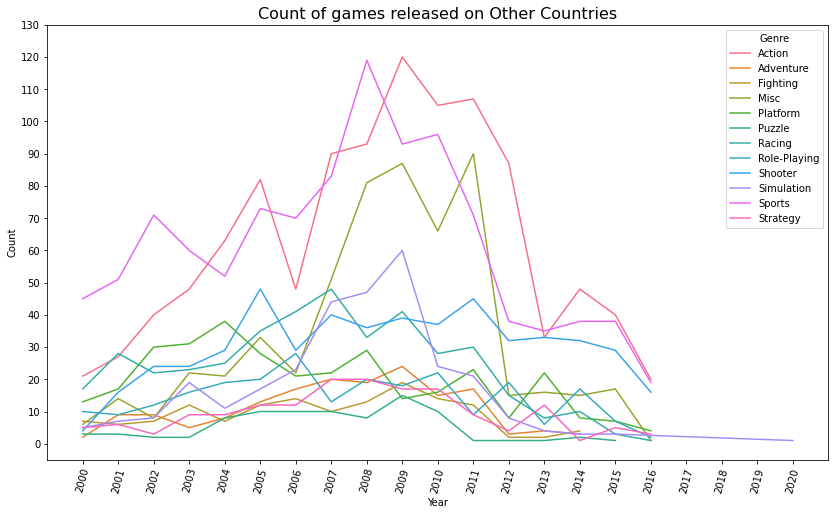

In [38]:

g_publisher_d = df[df['Other_Sales']>0.001].query('Publisher == @best_publishers').groupby(['Year', 'Genre']).agg({'Genre': 'count'}).rename(columns = {'Genre': 'Count'})
g_publisher_d

plt.figure(figsize = (14,8))
plt.title('Count of games released on Other Countries', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Genre', data = g_publisher_d)
plt.xticks(range(2000, 2021, 1), rotation = 75)
plt.yticks(range(0, 131, 10))
plt.show()

In [39]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv").dropna().drop(['Unnamed: 0'], axis=1)
df['Year'] = yearchangesheet(df['Year'])
df = sheettofloat(df, 'Name', 'Platform', 'Year', 'Genre', 'Publisher')

In [40]:
best_games_NA_XX = df.query('Year < 2000').sort_values('NA_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales']]
best_games_NA_XXI = df.query('Year >= 2000').sort_values('NA_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales']]

best_games_EU_XX = df.query('Year < 2000').sort_values('EU_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'EU_Sales']]
best_games_EU_XXI = df.query('Year >= 2000').sort_values('EU_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'EU_Sales']]

best_games_JP_XX = df.query('Year < 2000').sort_values('JP_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'JP_Sales']]
best_games_JP_XXI = df.query('Year >= 2000').sort_values('JP_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'JP_Sales']]

best_games_OT_XX = df.query('Year < 2000').sort_values('Other_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'Other_Sales']]
best_games_OT_XXI = df.query('Year >= 2000').sort_values('Other_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'Other_Sales']]

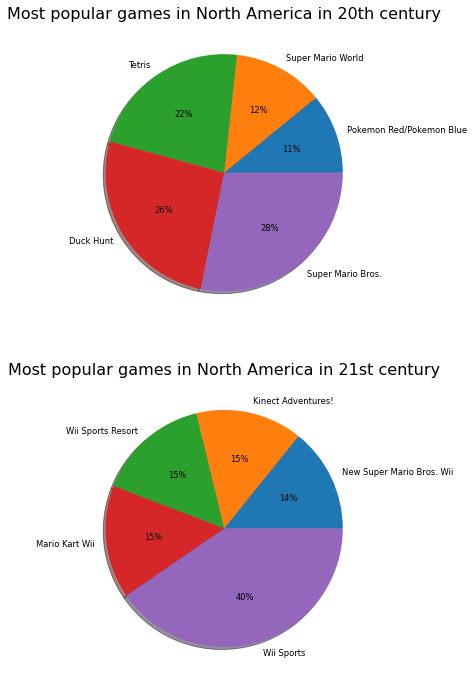

In [41]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in North America in 20th century', size = 16)
labels1 = best_games_NA_XX['Name']
fracs1 = best_games_NA_XX['NA_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in North America in 21st century', size = 16)
labels2 = best_games_NA_XXI['Name']
fracs2 = best_games_NA_XXI['NA_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()


In [42]:
best_games_NA_XX

,Name,Platform,Genre,Publisher,NA_Sales
7829,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27
13111,Super Mario World,SNES,Platform,Nintendo,12.78
1203,Tetris,GB,Puzzle,Nintendo,23.20
10488,Duck Hunt,NES,Shooter,Nintendo,26.93
4199,Super Mario Bros.,NES,Platform,Nintendo,29.08


In [43]:
best_games_NA_XXI

,Name,Platform,Genre,Publisher,NA_Sales
16531,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59
4343,Kinect Adventures!,X360,Misc,Microsoft Game Studios,14.97
3352,Wii Sports Resort,Wii,Sports,Nintendo,15.75
12579,Mario Kart Wii,Wii,Racing,Nintendo,15.85
2908,Wii Sports,Wii,Sports,Nintendo,41.49


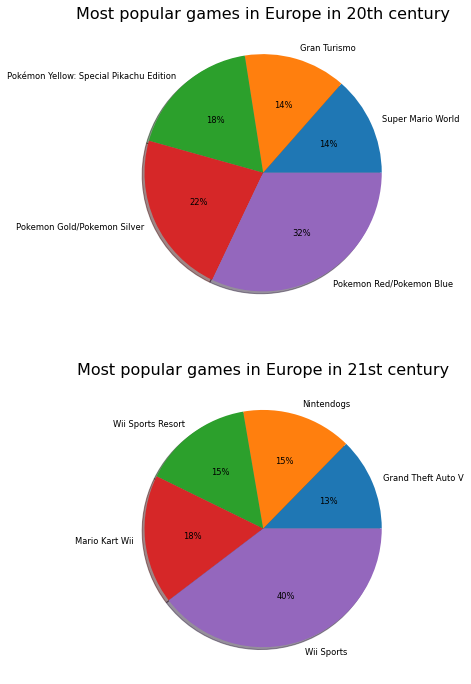

In [44]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in Europe in 20th century', size = 16)
labels1 = best_games_EU_XX['Name']
fracs1 = best_games_EU_XX['EU_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in Europe in 21st century', size = 16)
labels2 = best_games_EU_XXI['Name']
fracs2 = best_games_EU_XXI['EU_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()

In [45]:
best_games_EU_XX

,Name,Platform,Genre,Publisher,EU_Sales
13111,Super Mario World,SNES,Platform,Nintendo,3.75
4809,Gran Turismo,PS,Racing,Sony Computer Entertainment,3.87
8533,Pokémon Yellow: Special Pikachu Edition,GB,Role-Playing,Nintendo,5.04
9416,Pokemon Gold/Pokemon Silver,GB,Role-Playing,Nintendo,6.18
7829,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,8.89


In [46]:
best_games_EU_XXI

,Name,Platform,Genre,Publisher,EU_Sales
3483,Grand Theft Auto V,PS3,Action,Take-Two Interactive,9.27
11137,Nintendogs,DS,Simulation,Nintendo,11.00
3352,Wii Sports Resort,Wii,Sports,Nintendo,11.01
12579,Mario Kart Wii,Wii,Racing,Nintendo,12.88
2908,Wii Sports,Wii,Sports,Nintendo,29.02


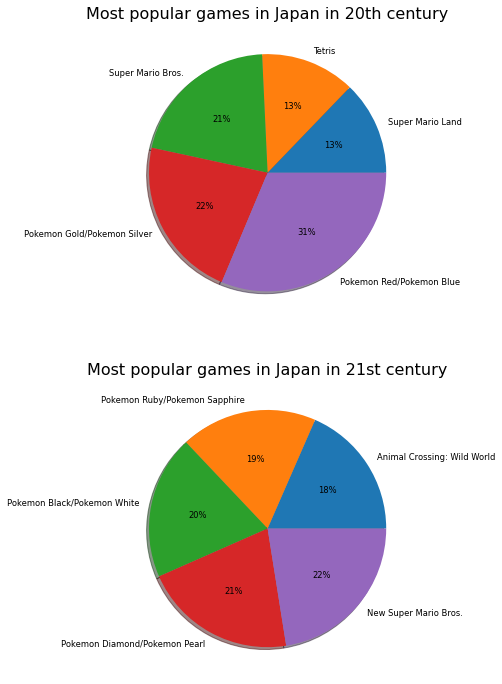

In [47]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in Japan in 20th century', size = 16)
labels1 = best_games_JP_XX['Name']
fracs1 = best_games_JP_XX['JP_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in Japan in 21st century', size = 16)
labels2 = best_games_JP_XXI['Name']
fracs2 = best_games_JP_XXI['JP_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()

In [48]:
best_games_JP_XX

,Name,Platform,Genre,Publisher,JP_Sales
9491,Super Mario Land,GB,Platform,Nintendo,4.18
1203,Tetris,GB,Puzzle,Nintendo,4.22
4199,Super Mario Bros.,NES,Platform,Nintendo,6.81
9416,Pokemon Gold/Pokemon Silver,GB,Role-Playing,Nintendo,7.20
7829,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,10.22


In [49]:
best_games_JP_XXI

,Name,Platform,Genre,Publisher,JP_Sales
3273,Animal Crossing: Wild World,DS,Simulation,Nintendo,5.33
10917,Pokemon Ruby/Pokemon Sapphire,GBA,Role-Playing,Nintendo,5.38
10621,Pokemon Black/Pokemon White,DS,Role-Playing,Nintendo,5.65
10555,Pokemon Diamond/Pokemon Pearl,DS,Role-Playing,Nintendo,6.04
6937,New Super Mario Bros.,DS,Platform,Nintendo,6.50


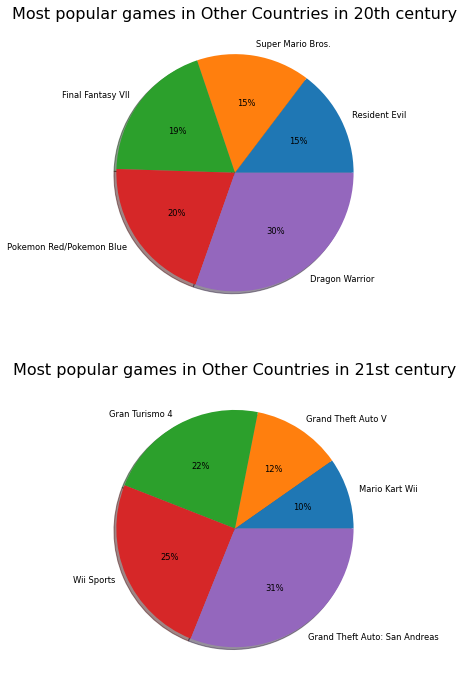

In [50]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in Other Countries in 20th century', size = 16)
labels1 = best_games_OT_XX['Name']
fracs1 = best_games_OT_XX['Other_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in Other Countries in 21st century', size = 16)
labels2 = best_games_OT_XXI['Name']
fracs2 = best_games_OT_XXI['Other_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()

In [51]:
best_games_OT_XX

,Name,Platform,Genre,Publisher,Other_Sales
2298,Resident Evil,PS,Action,Virgin Interactive,0.73
4199,Super Mario Bros.,NES,Platform,Nintendo,0.77
11704,Final Fantasy VII,PS,Role-Playing,Sony Computer Entertainment,0.96
7829,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,1.00
11610,Dragon Warrior,NES,Role-Playing,Capcom,1.51


In [52]:
best_games_OT_XXI

,Name,Platform,Genre,Publisher,Other_Sales
12579,Mario Kart Wii,Wii,Racing,Nintendo,3.31
3483,Grand Theft Auto V,PS3,Action,Take-Two Interactive,4.14
14665,Gran Turismo 4,PS2,Racing,Sony Computer Entertainment,7.53
2908,Wii Sports,Wii,Sports,Nintendo,8.46
14669,Grand Theft Auto: San Andreas,PS2,Action,Take-Two Interactive,10.57


In [53]:
import matplotlib.pyplot as plt
import plotly.express as px

In [73]:
sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

for i in sales:
  sales['Global_Sales'] = sales['NA_Sales'] + sales['EU_Sales'] + sales['JP_Sales'] + sales['Other_Sales']

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['Global_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'Global_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['Global_Sales'].sum())
finalx = finalx.reset_index()




sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['NA_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'NA_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['NA_Sales'].sum())
finalx = finalx.reset_index()

sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['NA_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'NA_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalxna = pd.DataFrame(final.groupby(['Platform', 'Year'])['NA_Sales'].sum())
finalxna = finalxna.reset_index()


sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['EU_Sales'] = 0

sales = sales.loc[:,['Platform', 'Year', 'EU_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finaleu = pd.DataFrame(final.groupby(['Platform', 'Year'])['EU_Sales'].sum())
finaleu = finaleu.reset_index()


sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['JP_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'JP_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalxjp = pd.DataFrame(final.groupby(['Platform', 'Year'])['JP_Sales'].sum())
finalxjp = finalxjp.reset_index()


sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['Other_Sales'] = 0

sales = sales.loc[:,['Platform', 'Year', 'Other_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalot = pd.DataFrame(final.groupby(['Platform', 'Year'])['Other_Sales'].sum())
finalot = finalot.reset_index()


In [74]:
nanintendo = finalxna[finalxna['Platform'] == 'Nintendo']
naxbox = finalxna[finalxna['Platform'] == 'Xbox']
naps = finalxna[finalxna['Platform'] == 'PlayStation']
nanintendo = nanintendo[nanintendo['Year'].apply(toint) > 1999]
naxbox = naxbox[naxbox['Year'].apply(toint) > 1999]
naps = naps[naps['Year'].apply(toint) > 1999]

eunintendo = finaleu[finaleu['Platform'] == 'Nintendo']
euxbox = finaleu[finaleu['Platform'] == 'Xbox']
eups = finaleu[finaleu['Platform'] == 'PlayStation']
eunintendo = eunintendo[eunintendo['Year'].apply(toint) > 1999]
euxbox = euxbox[euxbox['Year'].apply(toint) > 1999]
eups = eups[eups['Year'].apply(toint) > 1999]

jpnintendo = finalxjp[finalxjp['Platform'] == 'Nintendo']
jpps = finalxjp[finalxjp['Platform'] == 'PlayStation']
jpnintendo = jpnintendo[jpnintendo['Year'].apply(toint) > 1999]
jpps = jpps[jpps['Year'].apply(toint) > 1999]

othersnintendo = finalot[finalot['Platform'] == 'Nintendo']
othersxbox = finalot[finalot['Platform'] == 'Xbox']
othersps = finalot[finalot['Platform'] == 'PlayStation']
othersnintendo = othersnintendo[othersnintendo['Year'].apply(toint) > 1999]
othersxbox = othersxbox[othersxbox['Year'].apply(toint) > 1999]
othersps = othersps[othersps['Year'].apply(toint) > 1999]



In [83]:
nanintendo['NA_Sales']

215     26.11
216     57.83
217     77.75
218     65.97
219     68.77
220     88.25
221    133.14
222    162.24
223    177.63
224    178.95
225    115.60
226     74.75
227     41.81
228     25.94
229     24.65
230     13.16
231      2.32
232      0.00
233      0.27
Name: NA_Sales, dtype: float64

In [86]:
print(f_oneway(nanintendo['NA_Sales'], naxbox['NA_Sales'], naps['NA_Sales']))
print(f_oneway(eunintendo['EU_Sales'], euxbox['EU_Sales'], eups['EU_Sales']))
print(stats.ttest_ind(jpnintendo['JP_Sales'], jpps['JP_Sales']))
print(f_oneway(othersnintendo['Other_Sales'], othersxbox['Other_Sales'], othersps['Other_Sales']))

F_onewayResult(statistic=1.8371097683673108, pvalue=0.1690927186411303)
F_onewayResult(statistic=7.909603659204556, pvalue=0.000971200377029399)
Ttest_indResult(statistic=1.35557474327455, pvalue=0.1836784064825445)
F_onewayResult(statistic=17.187563067934402, pvalue=1.6738643323985866e-06)


In [101]:
v = np.concatenate([eunintendo['EU_Sales'], euxbox['EU_Sales'], eups['EU_Sales']])
labels = ['eu_nintendo']*len(eunintendo['EU_Sales']) + ['eu_Xbox']*len(euxbox['EU_Sales']) + ['EU_playstation']*len(eups['EU_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)
v = np.concatenate([othersnintendo['Other_Sales'], othersxbox['Other_Sales'], othersps['Other_Sales']])
labels = ['Other_nintendo']*len(othersnintendo['Other_Sales']) + ['Other_Xbox']*len(othersxbox['Other_Sales']) + ['Other_playstation']*len(othersps['Other_Sales'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2   meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------
EU_playstation     eu_Xbox -28.5853  0.001 -45.9058 -11.2647   True
EU_playstation eu_nintendo -14.1958 0.1281 -31.5164   3.1248  False
       eu_Xbox eu_nintendo  14.3895 0.1216  -2.9311    31.71  False
-------------------------------------------------------------------
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1           group2      meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------
    Other_Xbox    Other_nintendo   3.5484 0.4864 -3.8538 10.9507  False
    Other_Xbox Other_playstation  17.0642  0.001   9.662 24.4664   True
Other_nintendo Other_playstation  13.5158  0.001  6.1136  20.918   True
-----------------------------------------------------------------------


In [56]:
sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

for i in sales:
  sales['Global_Sales'] = sales['NA_Sales'] + sales['EU_Sales'] + sales['JP_Sales'] + sales['Other_Sales']

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['Global_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'Global_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['Global_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
    data_frame=finalx,
    y='Global_Sales',
    x='Platform',
    animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()


In [ ]:
sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['NA_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'NA_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['NA_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
    data_frame=finalx,
    y='NA_Sales',
    x='Platform',
    animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()


In [ ]:
sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['EU_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'EU_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['EU_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
    data_frame=finalx,
    y='EU_Sales',
    x='Platform',
    animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()


In [ ]:
sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['JP_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'JP_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['JP_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
    data_frame=finalx,
    y='JP_Sales',
    x='Platform',
    animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()


In [ ]:
sales = df.dropna(subset=['Year'], how='all')
sales['Year'] = sales['Year'].astype(str)
sales = sales.sort_values(by=['Year'])

# Code to create 'empty data', necessary to fit in the data into the plotly slide figure
platform = list(sales['Platform'].value_counts().index)
year = list(sales['Year'].value_counts().sort_index().index)

d = {}
p = []
y = []


for i in platform:
    for j in year:
        p.append(i)
        y.append(j)

d['Platform'] = p
d['Year'] = y

scratch = pd.DataFrame(d)
scratch['Other_Sales'] = 0


sales = sales.loc[:,['Platform', 'Year', 'Other_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year'])

finalx = pd.DataFrame(final.groupby(['Platform', 'Year'])['Other_Sales'].sum())
finalx = finalx.reset_index()

# Plotly figure with slide
fig = px.bar(
    data_frame=finalx,
    y='Other_Sales',
    x='Platform',
    animation_frame='Year', template="plotly_white", color_discrete_sequence=['rgb(254, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()

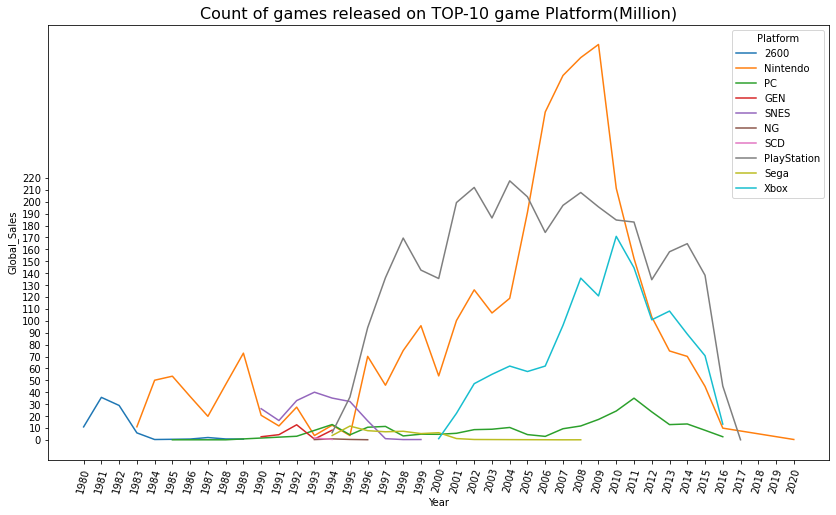

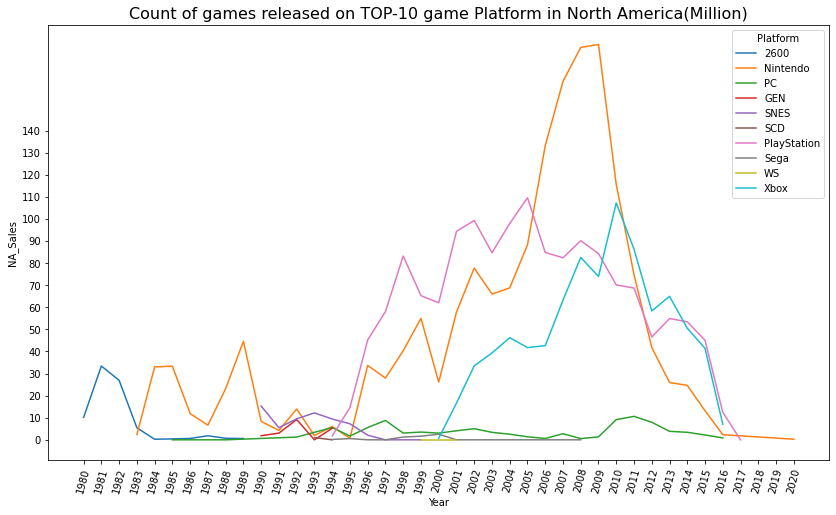

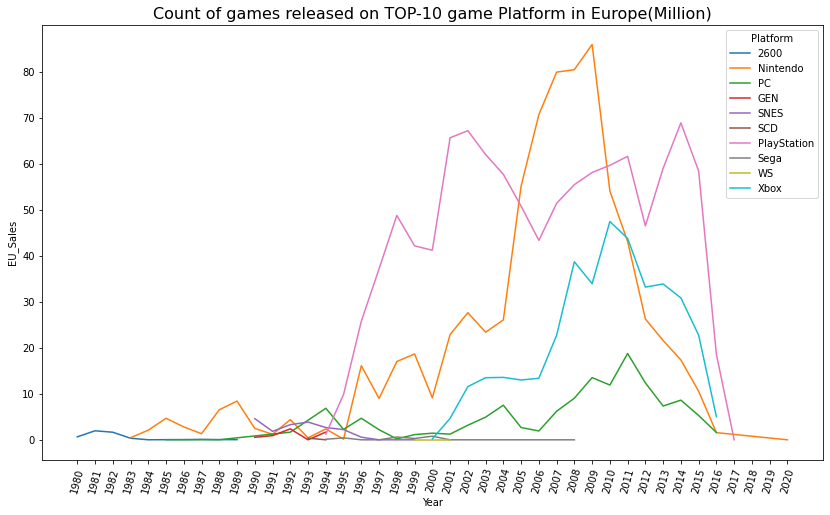

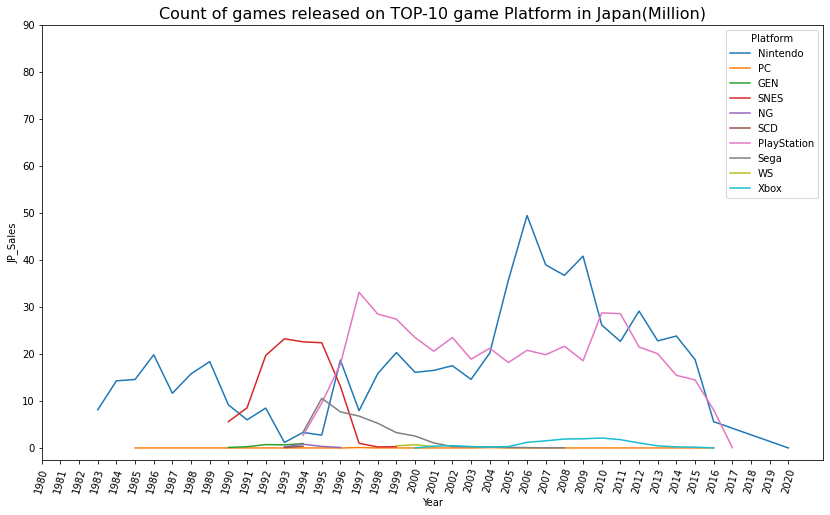

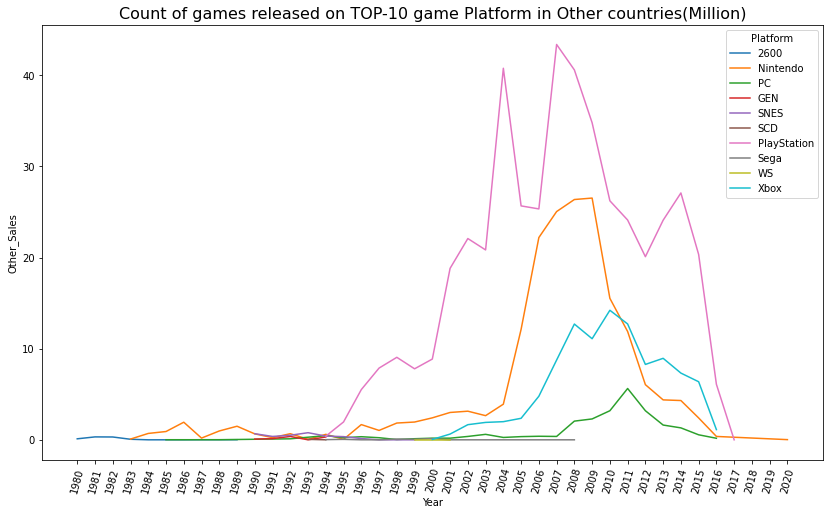

In [58]:
nintendo = ['GB', 'DS', 'Wii', 'GBA', 'GC', 'N64', 'WiiU', '3DS', 'NES']
playstation = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
xbox = ['XB', 'X360', 'XOne']
sega = ['SAT', 'DC']

for i in df:
  df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df = df.replace(nintendo, 'Nintendo').replace(playstation, 'PlayStation').replace(xbox, 'Xbox').replace(sega, 'Sega')

games_consoles = df.groupby('Platform').agg({'Global_Sales': 'sum'}).sort_values('Global_Sales')

best_Platform = games_consoles.tail(10).reset_index()['Platform'].to_list()
g_platform_d = df.query('Platform == @best_Platform').groupby(['Year', 'Platform']).agg({'Global_Sales': 'sum'}).rename(columns = {'Platform': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game Platform(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Platform', data = g_platform_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 230, 10))
plt.show()

games_consoles = df.groupby('Platform').agg({'NA_Sales': 'sum'}).sort_values('NA_Sales')

best_Platform = games_consoles.tail(10).reset_index()['Platform'].to_list()
g_platform_d = df.query('Platform == @best_Platform').groupby(['Year', 'Platform']).agg({'NA_Sales': 'sum'}).rename(columns = {'Platform': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game Platform in North America(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'NA_Sales', hue = 'Platform', data = g_platform_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 150, 10))
plt.show()

games_consoles = df.groupby('Platform').agg({'EU_Sales': 'sum'}).sort_values('EU_Sales')

best_Platform = games_consoles.tail(10).reset_index()['Platform'].to_list()
g_platform_d = df.query('Platform == @best_Platform').groupby(['Year', 'Platform']).agg({'EU_Sales': 'sum'}).rename(columns = {'Platform': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game Platform in Europe(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'EU_Sales', hue = 'Platform', data = g_platform_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 90, 10))
plt.show()

games_consoles = df.groupby('Platform').agg({'JP_Sales': 'sum'}).sort_values('JP_Sales')

best_Platform = games_consoles.tail(10).reset_index()['Platform'].to_list()
g_platform_d = df.query('Platform == @best_Platform').groupby(['Year', 'Platform']).agg({'JP_Sales': 'sum'}).rename(columns = {'Platform': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game Platform in Japan(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'JP_Sales', hue = 'Platform', data = g_platform_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 100, 10))
plt.show()

games_consoles = df.groupby('Platform').agg({'Other_Sales': 'sum'}).sort_values('Other_Sales')

best_Platform = games_consoles.tail(10).reset_index()['Platform'].to_list()
g_platform_d = df.query('Platform == @best_Platform').groupby(['Year', 'Platform']).agg({'Other_Sales': 'sum'}).rename(columns = {'Platform': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game Platform in Other countries(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'Other_Sales', hue = 'Platform', data = g_platform_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 50, 10))
plt.show()

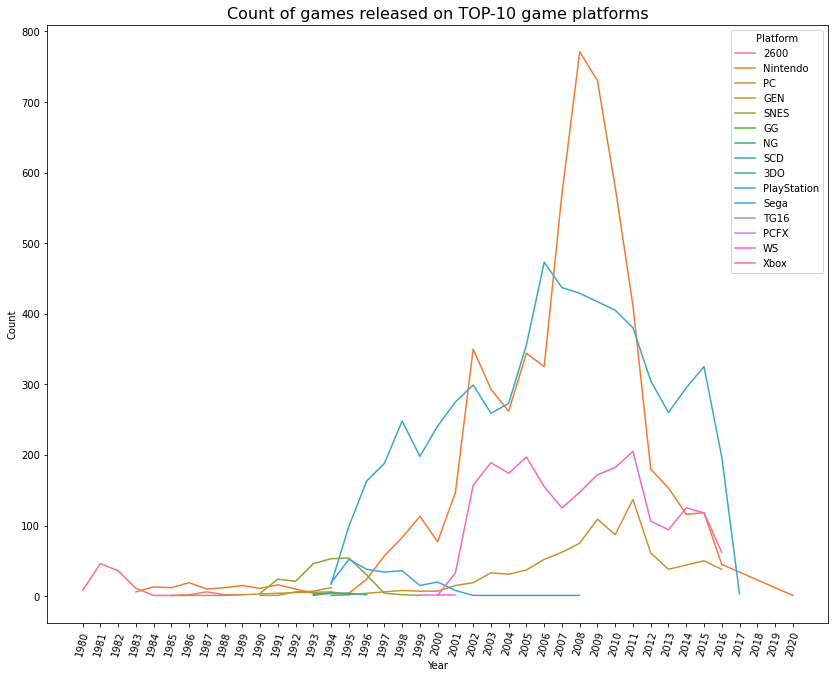

In [61]:
nintendo = ['GB', 'DS', 'Wii', 'GBA', 'GC', 'N64', 'WiiU', '3DS', 'NES']
playstation = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
xbox = ['XB', 'X360', 'XOne']
sega = ['SAT', 'DC']

df = df.replace(nintendo, 'Nintendo').replace(playstation, 'PlayStation').replace(xbox, 'Xbox').replace(sega, 'Sega').replace('Platform', 'ptf')

best_platforms = df.reset_index()['Platform'].to_list()
plfpower = df.query('Platform == @best_platforms').groupby(['Year', 'Platform']).agg({'Platform': 'count'}).rename(columns = {'Platform': 'Count'})

plt.figure(figsize = (14,11))
plt.title('Count of games released on TOP-10 game platforms', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Platform', data = plfpower)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 850, 100)), 
plt.show()

In [63]:
ninpower = df[df['Platform']=='Nintendo'].query('Platform == @best_platforms').groupby(['Year', 'Platform']).agg({'Platform': 'count'}).rename(columns = {'Platform': 'Count'})
pspower = df[df['Platform']=='PlayStation'].query('Platform == @best_platforms').groupby(['Year', 'Platform']).agg({'Platform': 'count'}).rename(columns = {'Platform': 'Count'})

In [64]:
ninpp = df[df['Platform'] == 'Nintendo'].groupby(['Platform', 'Year'], as_index=False).mean().set_index(['Year', 'Platform']).sort_values(by=['Year'], axis=0)
pspp = df[df['Platform'] == 'PlayStation'].groupby(['Platform', 'Year'], as_index=False).mean().set_index(['Year', 'Platform']).sort_values(by=['Year'], axis=0)

ninna = pd.concat([ninpower['Count'], ninpp['NA_Sales']], axis=1)
nineu = pd.concat([ninpower['Count'], ninpp['EU_Sales']], axis=1)
ninjp = pd.concat([ninpower['Count'], ninpp['JP_Sales']], axis=1)
ninot = pd.concat([ninpower['Count'], ninpp['Other_Sales']], axis=1)

psna = pd.concat([pspower['Count'], pspp['NA_Sales']], axis=1)
pseu = pd.concat([pspower['Count'], pspp['EU_Sales']], axis=1)
psjp = pd.concat([pspower['Count'], pspp['JP_Sales']], axis=1)
psot = pd.concat([pspower['Count'], pspp['Other_Sales']], axis=1)

print(stats.pearsonr(ninna.Count, ninna.NA_Sales))
print(stats.pearsonr(nineu.Count, nineu.EU_Sales))
print(stats.pearsonr(ninjp.Count, ninjp.JP_Sales))
print(stats.pearsonr(ninot.Count, ninot.Other_Sales))

(-0.3976799809488482, 0.017992723905817083)
(-0.3009237322911985, 0.07898483010107123)
(-0.5768849851155042, 0.0002860183509933711)
(-0.19937407299652074, 0.2508654687160458)


In [65]:
print(stats.pearsonr(psna.Count, psna.NA_Sales))
print(stats.pearsonr(pseu.Count, pseu.EU_Sales))
print(stats.pearsonr(psjp.Count, psjp.JP_Sales))
print(stats.pearsonr(psot.Count, psot.Other_Sales))

(0.22312135822669743, 0.29463869950160576)
(0.2552454789820596, 0.2286846974243712)
(-0.44494603301038144, 0.029356391014599224)
(0.6344234092705844, 0.0008696956945228564)


In [69]:
plfpower = df.query('Platform == @best_platforms').groupby(['Year', 'Platform']).agg({'Platform': 'count'}).rename(columns = {'Platform': 'Count'})
plfpp = df.sort_values(['Year', 'Platform']).groupby(['Year', 'Platform']).mean()
plfna = pd.concat([plfpower, plfpp['NA_Sales']], axis=1)
plfeu = pd.concat([plfpower, plfpp['EU_Sales']], axis=1)
plfjp = pd.concat([plfpower, plfpp['JP_Sales']], axis=1)
plfot = pd.concat([plfpower, plfpp['Other_Sales']], axis=1)

In [70]:
gamena = df.drop(['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
gameeu = df.drop(['NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
gamejp = df.drop(['NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
gameot = df.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'], axis=1)

In [68]:
gamena

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Candace Kane's Candy Factory,Nintendo,2008,Action,Destineer,0.04
1,The Munchables,Nintendo,2009,Action,Namco Bandai Games,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PlayStation,2010,Adventure,Alchemist,0.00
3,Deal or No Deal: Special Edition,Nintendo,2010,Misc,Zoo Games,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PlayStation,2010,ptf,D3Publisher,0.12
...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,Nintendo,2006,ptf,Vivendi Games,0.15
16594,Rainbow Islands: Revolution,PlayStation,2005,Action,Rising Star Games,0.01
16595,NBA 2K16,PlayStation,2015,Sports,Take-Two Interactive,0.44
16596,Toukiden: The Age of Demons,PlayStation,2013,Action,Tecmo Koei,0.05


In [ ]:
for i in df:
  df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

games_publishers = df.groupby('Publisher').agg({'Global_Sales': 'sum'}).sort_values('Global_Sales')

best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()
g_publisher_d = df.query('Publisher == @best_publishers').groupby(['Year', 'Publisher']).agg({'Global_Sales': 'sum'}).rename(columns = {'Publisher': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game publishers(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Publisher', data = g_publisher_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 230, 10))
plt.show()

In [ ]:
games_publishers = gamena.groupby('Publisher').agg({'NA_Sales': 'sum'}).sort_values('NA_Sales')

best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()
g_publisher_d = gamena.query('Publisher == @best_publishers').groupby(['Year', 'Publisher']).agg({'NA_Sales': 'sum'}).rename(columns = {'Publisher': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game publishers in North America(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'NA_Sales', hue = 'Publisher', data = g_publisher_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 110, 10))
plt.show()

In [ ]:
games_publishers = gameeu.groupby('Publisher').agg({'EU_Sales': 'sum'}).sort_values('EU_Sales')

best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()
g_publisher_d = gameeu.query('Publisher == @best_publishers').groupby(['Year', 'Publisher']).agg({'EU_Sales': 'sum'}).rename(columns = {'Publisher': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game publishers in Europe(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'EU_Sales', hue = 'Publisher', data = g_publisher_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 70, 10))
plt.show()

In [ ]:
games_publishers = gamejp.groupby('Publisher').agg({'JP_Sales': 'sum'}).sort_values('JP_Sales')

best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()
g_publisher_d = gamejp.query('Publisher == @best_publishers').groupby(['Year', 'Publisher']).agg({'JP_Sales': 'sum'}).rename(columns = {'Publisher': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game publishers in Japan(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'JP_Sales', hue = 'Publisher', data = g_publisher_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 40, 10))
plt.show()

In [ ]:
games_publishers = gameot.groupby('Publisher').agg({'Other_Sales': 'sum'}).sort_values('Other_Sales')

best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()
g_publisher_d = gameot.query('Publisher == @best_publishers').groupby(['Year', 'Publisher']).agg({'Other_Sales': 'sum'}).rename(columns = {'Publisher': 'Count'})

plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game publishers in Other Countries(Million)', size = 16)
sns.lineplot(x = 'Year', y = 'Other_Sales', hue = 'Publisher', data = g_publisher_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 30, 10))
plt.show()

In [ ]:
best_publisher = df.reset_index()['Publisher'].to_list()
pubpower = df.query('Publisher == @best_publisher').groupby(['Year', 'Publisher']).agg({'Publisher': 'count'}).rename(columns = {'Publisher': 'Count'})
pub = df.groupby(['Publisher', 'Year'], as_index=False).mean().set_index(['Year', 'Publisher']).sort_values(by=['Year'], axis=0)


pubna = pd.concat([pubpower['Count'], pub['NA_Sales']], axis=1)
pubeu = pd.concat([pubpower['Count'], pub['EU_Sales']], axis=1)
pubjp = pd.concat([pubpower['Count'], pub['JP_Sales']], axis=1)
pubot = pd.concat([pubpower['Count'], pub['Other_Sales']], axis=1)

In [ ]:
stats.pearsonr(pubna.Count, pubna.NA_Sales)

In [ ]:
stats.pearsonr(pubeu.Count, pubeu.EU_Sales)

In [ ]:
stats.pearsonr(pubjp['Count'], pubjp['JP_Sales'])

In [ ]:
stats.pearsonr(np.array(pubot['Count']), np.array(pubot['Other_Sales']))

In [ ]:
stats.pearsonr(pubeu['Count'], pubeu['EU_Sales'])

In [ ]:
stats.pearsonr(pubjp['Count'], pubjp['JP_Sales'])

In [ ]:
stats.pearsonr(pubot['Count'], pubot['Other_Sales'])